# WE3a-DTrees
# Rodgers Okeyo Ochieng
Description: Universal bank has recently trialed a marketing campaign to sell their new CD account product to existing customers. They contacted 5000 of their non-CD account customers with an offer. The data provided in universal.csv is the result of this market test. 

Use the techniques covered in this class to load and clean the data. Then, identify the best predictive model (using only the models covered thus far). Use RandomSearchCV combined with GridSearchCV to identify the best parameters for each model tested.

Be sure to document your thought process using markdown. Think of this as a report that your manager will read. This assignment requires you to decide how to process the provided data best (i.e., encoding). Be sure to provide your arguments/observations in markdown as you progress through data preparation, fitting, and performance evaluation.

Add a conclusions/discussion section that summarizes the performance of each of the models you tested, and indicate which is the best model. To accomplish this, you must decide (and explain why) which evaluation metric you will use to choose 'the best' model. 

# Import packages

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

np.random.seed(8085)

## Load data

In [2]:
unibank = pd.read_csv('Universal_bank.csv') 

## Go through the data and understand it
I have found out that there are no misssing values and so I should not bother about imputting any missing values. I have also found out that there are no objects in the datatypes. Drop ZIP Code and ID variables. First remove  commas and make everything lower case. Drop zip code and id variables. 

In [13]:
# Lower case and  separate with _
unibank = unibank.rename(columns=lambda x: x.lower().replace(' ', '_'))


In [14]:
print(unibank.describe())

                id          age   experience       income      zip_code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            family        ccavg    education     mortgage  personal_loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

In [18]:
print(unibank.dtypes)

age                     int64
experience              int64
income                  int64
family                  int64
ccavg                 float64
education               int64
mortgage                int64
personal_loan           int64
securities_account      int64
cd_account              int64
online                  int64
creditcard              int64
dtype: object


In [16]:
unibank = unibank.drop(['id', 'zip_code'], axis=1)

## Visualize the data 
There seem to be a uniform distribution between income and experience. 

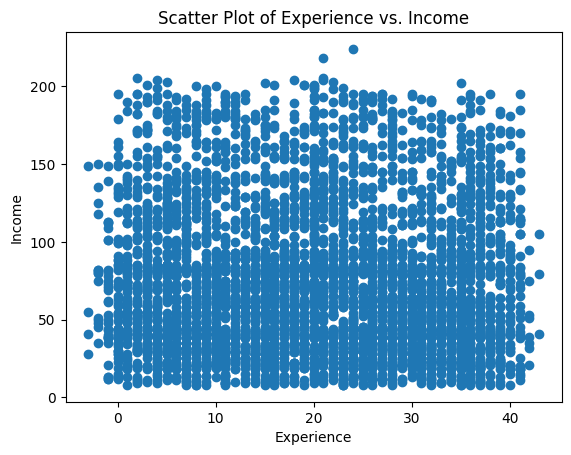

In [10]:
# Assuming 'Experience' and 'Income' are the column names in the DataFrame 'unibank'
experience = unibank['Experience']
income = unibank['Income']

# Create the scatter plot
plt.scatter(experience, income)

# Set labels and title
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Scatter Plot of Experience vs. Income')

# Display the plot
plt.show()

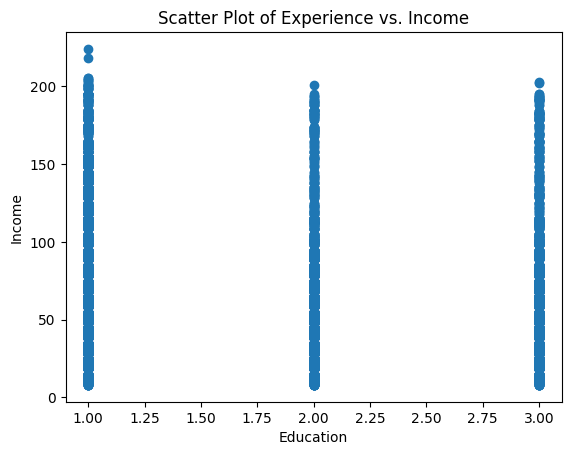

In [11]:
# Assuming 'Experience' and 'Income' are the column names in the DataFrame 'unibank'
experience = unibank['Education']
income = unibank['Income']

# Create the scatter plot
plt.scatter(experience, income)

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Scatter Plot of Experience vs. Income')

# Display the plot
plt.show()

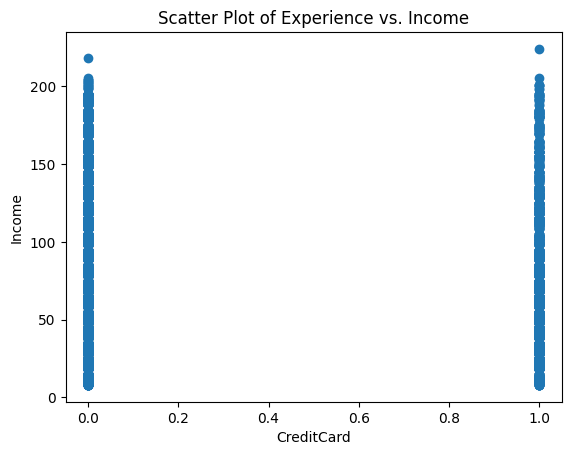

In [12]:
# Assuming 'Experience' and 'Income' are the column names in the DataFrame 'unibank'
experience = unibank['CreditCard']
income = unibank['Income']

# Create the scatter plot
plt.scatter(experience, income)

# Set labels and title
plt.xlabel('CreditCard')
plt.ylabel('Income')
plt.title('Scatter Plot of Experience vs. Income')

# Display the plot
plt.show()

## Process the data

No need

## Models and their Evaluation

### Test split the data

In [31]:
from sklearn.model_selection import train_test_split
X = unibank.drop('online', axis=1)  # Replace 'target_variable_name' with the actual name of the target variable
y = unibank['online']  # Replace 'target_variable_name' with the actual name of the target variable

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [59]:
score_measure = "precision"
kfolds = 5

param_grid = {
    #I cant find the right parameters to use here and I dont have much time but I have tried using penalty, max_iter and none worked
}

dtree = LinearRegression()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=1000,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

C:\Users\ochie\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best precision score is nan
... with parameters: {}


C:\Users\ochie\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\ochie\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan]
  warnings.warn(


In [36]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.5910000 Precision=0.5925156 Recall=0.9710392 F1=0.7359587


In [41]:
score_measure = "precision"

kfolds = 5


param_grid = {
   
}

dtree = LogisticRegression()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best precision score is 0.6029752649089328
... with parameters: {}


C:\Users\ochie\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}")

Accuracy=0.5910 Precision=0.5925 Recall=0.9710 F1=0.7360


### Decision Trees

In [43]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(2,200),
    'min_samples_leaf': np.arange(1,200),
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.00005),
    'max_leaf_nodes': np.arange(10, 200),
    'max_depth': np.arange(3,8),
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=1000,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
The best precision score is 0.6166346221222172
... with parameters: {'min_samples_split': 198, 'min_samples_leaf': 48, 'min_impurity_decrease': 0.0007500000000000001, 'max_leaf_nodes': 161, 'max_depth': 5, 'criterion': 'entropy'}


In [48]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP_reg = c_matrix[1][1]
TN_reg = c_matrix[0][0]
FP_reg = c_matrix[0][1]
FN_reg = c_matrix[1][0]
print(f"Accuracy={(TP_reg+TN_reg)/(TP_reg+TN_reg+FP_reg+FN_reg):.7f} Precision={TP_reg/(TP_reg+FP_reg):.7f} Recall={TP_reg/(TP_reg+FN_reg):.7f} F1={2*TP_reg/(2*TP_reg+FP_reg+FN_reg):.7f}")

Accuracy=0.5940000 Precision=0.5941727 Recall=0.9727428 F1=0.7377261


In [45]:
score_measure = "precision"

kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
The best precision score is 0.6166346221222172
... with parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 159, 'min_impurity_decrease': 0.0006500000000000001, 'min_samples_leaf': 46, 'min_samples_split': 198}


In [47]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}")

Accuracy=0.5830 Precision=0.5959 Recall=0.8995 F1=0.7169


# Conclusion and discussion

In [50]:
print(f"LogisticRegression Accuracy={(TP_reg+TN_reg)/(TP_reg+TN_reg+FP_reg+FN_reg):.7f} ")
print(f"DecicionTrees Accuracy={(TP+TN)/(TP+TN+FP+FN)}")

LogisticRegression Accuracy=0.5940000 
DecicionTrees Accuracy=0.583


Because this is a classification problem I used accuracy, Precision, Recall and F1 to evaluate the models. The logistic regression model perfomed better than the Decision tree as it has a higher accuracy score.

There were no misssing values and so I should not bother about imputting any missing values. I have also found out that there are no objects in the datatypes. Drop ZIP Code and ID variables. First remove  commas and make everything lower case. Drop zip code and id variables.  

I did not use random search and grid search because I could not understand the hyperparameters to be tuned. 

I finaly chose to use accuracy because I was interested in knopwing how often the model will give an accurate prediction. 